In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

1 (0.5 pt.) Caricare in un dataframe le informazioni presenti nel foglio ‘customers’ del file BikeStores presenta al link 

In [ ]:
df = pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true','customers')
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


2 (1 pt.) Sostituire negli indirizzi la parola ‘St’ alla parola ‘Street’

In [ ]:
df["street"] = df["street"].str.replace("St.","Street")
df

,customer_id,name,surname,phone,email,street,city,state,zip_code,domain
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0,yahoo.com
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Streeteeteet,Campbell,CA,95008.0,yahoo.com
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek Streeteet,Redondo Beach,CA,90278.0,aol.com
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0,aol.com
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0,msn.com
...,...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp Streeteet,Staten Island,NY,10301.0,msn.com
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0,gmail.com
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Streeteeteet,Central Islip,NY,11722.0,gmail.com
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0,gmail.com


3. (1 pt.) Visualizzare la mail dei clienti che abitano in California (CA) ma non a Sacramento

In [ ]:
df[(df["state"]== "CA") & df["city"] != "Sacramento"]["email"]

0         debra.burks@yahoo.com
1          kasha.todd@yahoo.com
2         tameka.fisher@aol.com
3          daryl.spence@aol.com
4       charolette.rice@msn.com
                 ...           
1440    jamaal.morrison@msn.com
1441     cassie.cline@gmail.com
1442      lezlie.lamb@gmail.com
1443     ivette.estes@gmail.com
1444    ester.acevedo@gmail.com
Name: email, Length: 1445, dtype: object

4. (0.5 pt.) Rinominare la colonna ‘first_name’ in ‘name’ e la colonna’ last_name’ in ‘surname’

In [ ]:
df = df.rename(columns={"first_name": "name", "last_name":"surname"})


5. (1 pt) Creare una nuova colonna che contenga solo i domini degli indirizzi della posta elettronica (es.
hotmail.com). Chiamare la nuova colonna ‘domain’

In [ ]:
df['domain'] = df['email'].str.split('@').str[1]
df

,customer_id,name,surname,phone,email,street,city,state,zip_code,domain
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0,yahoo.com
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Streeteet,Campbell,CA,95008.0,yahoo.com
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek Street,Redondo Beach,CA,90278.0,aol.com
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0,aol.com
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0,msn.com
...,...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp Street,Staten Island,NY,10301.0,msn.com
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0,gmail.com
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Streeteet,Central Islip,NY,11722.0,gmail.com
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0,gmail.com


6 (1.5 pt) Calcolare il numero di clienti per ogni dominio di posta elettronica. Visualizzare il nome del dominio e il numero di clienti che hanno quel dominio. Ordinare in ordine decrescente sul numero di clienti e visualizzare le informazioni in un grafico a barre verticali. Dare un nome appropriato al titolo del grafico e agli assi

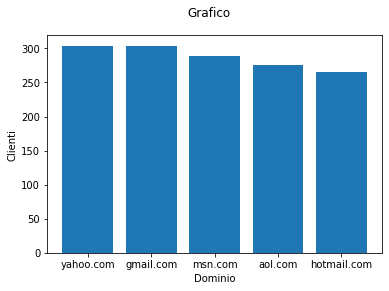

In [ ]:
df2 = df.groupby("domain")["name"].count().sort_values(ascending = False)
fig = plt.figure()
ax = plt.axes()
ax.bar(df2.index,df2.values)
fig.suptitle("Grafico")
ax.set_xlabel("Dominio")
ax.set_ylabel("Clienti")
plt.show()

7 (1.5 pt.) Calcolare, per ogni città, il numero di domini e visualizzare le città in cui ci sono almeno 10 domini diversi

In [ ]:
df3 = df.groupby("city")["domain"].nunique().reset_index()
df3[df3["domain"]>=10]["city"]  

Series([], Name: city, dtype: object)

8. (1 pt.) Visualizzare il cognome più diffuso tra i clienti di BikeStores


In [ ]:
cognome = df.groupby("surname")["name"].count().sort_values(ascending=False)
cognome.head(1).index

Index(['Larson'], dtype='object', name='surname')

9 (1 pt.) Eliminare dal dataframe tutti i clienti che vivono in una zona che ha lo zip_code (analogo al nostro CAP) che comincia con 141 (supporre che lo zip_code sia una stringa)